### open Food Facts ###
https://world.openfoodfacts.org/


https://www.kaggle.com/openfoodfacts/world-food-facts/home


In [13]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import matplotlib.ticker as mtick
from datetime import datetime, date, time




In [ ]:
df_food = pd.read_csv('./en.openfoodfacts.org.products.csv', sep="\t")  
df_food.head(5)


<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA</b><br>
<i>The goal of this part is to understand the data and check if it seems to be completed and trustworthy.
</i>
<hr>
<b>Who are the Contributors</b><br>
We would like to check who are the contributors, who is contributing the more, could we trust the source and could we found some references in the net.

<b>What are the Brands</b> <br>
We would like to check if all products are assigned to a Brand and check if all those Brand exists (cross check with wikipedia per example)


<b>What are the Countries or Origins</b> <br>
We would like to check if all products are assigned to a Countries and to an Origins (Countries).
As we suspect duplicate and non-normalized data, those values should most probably be cleaned.

<b>Check if there are some more anomalies in data</b><br>
So far it seems that some Products have been entered many times.

<hr>
<b>Please notice that the file has been dowloaded from Internet and we should check if the file in the Cluster is identical</b>

</div>



<p style="color:#3C763D"><i>
    Generic Functions required to perform our Analysis 
</i></p>

In [107]:
##### Calculate the number of rows of a specific DF
def get_rows(df):
    rows = df.shape[0]
    return rows


##### Return the 10 rows with percentage of a specific DF
def get_top_10(df, column_name):
    rows = get_rows(df)
    
    counts = df[column_name].value_counts()
    counts = counts.to_frame(name='counts')
    
    counts['percentage'] = counts['counts']/rows*100

    return counts.head(10).copy()

def get_empty_rows(df, column_name):
    return df.query(str(column_name) + '.isnull()').count()
    
def show_plot(df):
    df[['counts']].sort_values(by=['counts']).plot(kind='barh', stacked=True, figsize=(10,10))
    plt.show()
    
    
def print_stats(df, column_name):
    total_rows = get_rows(df)
    empty_rows = str(df[column_name].isna().sum())
    perc = int(empty_rows) * 100 / int(total_rows)
    print ('Number of empty records for ' + str(column_name) + ': ' + str(empty_rows) + ' (' + str(perc) + '%)' )
    print (df[column_name].agg(['nunique','count','size']))

<p style="color:#3C763D"><i>
    <b>UNDERSTANDING THE DATA</b>: Overview 
</i></p>

In [108]:
print('Open Food Data contains ' + str(get_rows(df_food)) + ' products.' + str(df_food.shape) )



Open Food Data contains 681602 products.(681602, 173)


<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Contributors</b><br>
<i>We are looking who are the contributors and what are their contributions by Products (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Who are those contributors ? except usda-ndb-import and openfood-ch-import, could we trust them ?

Almost 44% of the products have been created by kiliweb. Who is kiliweb ?

Furthermore, there are records (3) without contributor (creator)
</i>
<br>
</div>



Top 10 Contributors (Counts & Percentage)
                            counts  percentage
kiliweb                     299820   43.987547
usda-ndb-import             169861   24.920848
openfoodfacts-contributors   82719   12.135968
date-limite-app              17453    2.560585
openfood-ch-import           11459    1.681186
tacite                        8438    1.237966
sebleouf                      8359    1.226376
tacinte                       5282    0.774939
stephane                      2774    0.406982
javichu                       2766    0.405809


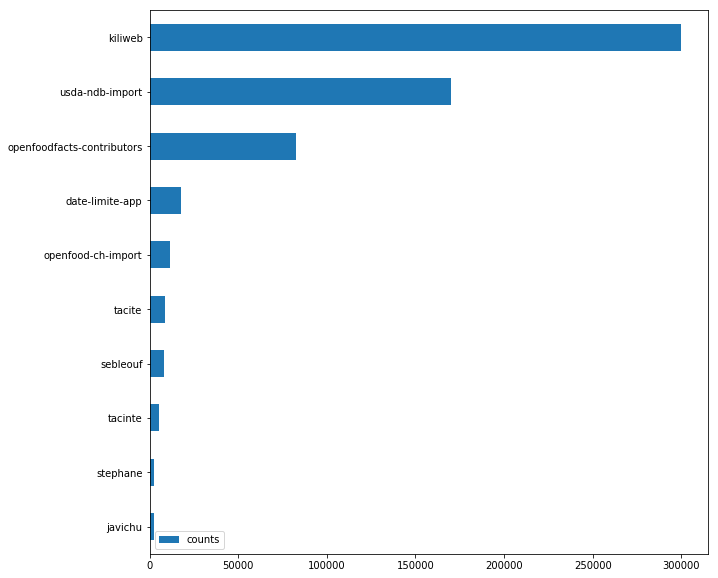

Number of empty records for creator: 3 (0.0004401395535811221%)
nunique      6544
count      681599
size       681602
Name: creator, dtype: int64


In [109]:
##### Get top 10 Contributors
df_10_contributors = get_top_10(df_food, 'creator')

##### Show Result
print('\nTop 10 Contributors (Counts & Percentage)')
print(df_10_contributors)    
show_plot(df_10_contributors)

##### Show Information about empty records
print_stats(df_food, 'creator')

<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Brands</b><br>
<i>We are looking what are the Brands (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Almost 32% of the products have not assigned to any 'Brand', why ?
</i>
<br>
</div>



Top 10 Brands (Counts & Percentage)
              counts  percentage
Carrefour       5384    0.789904
Auchan          5313    0.779487
U               4401    0.645685
Casino          3130    0.459212
Leader Price    2825    0.414465
Cora            2230    0.327170
Meijer          1997    0.292986
Kroger          1673    0.245451
Picard          1517    0.222564
Ahold           1370    0.200997


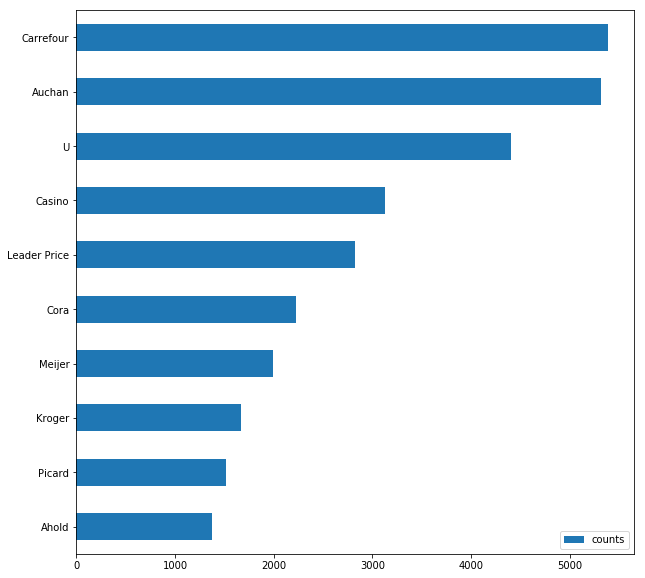

Number of empty records for brands: 221177 (32.449582014137285%)
nunique     98663
count      460425
size       681602
Name: brands, dtype: int64


In [110]:
##### Get top 10 Brands
df_10_brands = get_top_10(df_food, 'brands')

##### Show Result
print('\nTop 10 Brands (Counts & Percentage)')
print(df_10_brands)    
show_plot(df_10_brands)

##### Show Information about empty records
print_stats(df_food, 'brands')

<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Countries</b><br>
<i>We are looking what are the countries_en (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Almost 60% of the Product seems assigned to France, which is very suspicious and requires further investigations.
    
Some products seem to be linked to multiple countries like (Belgium, France)

Few records (5444) are not linked to any country.
</i>
<br>
</div>


Top 10 countries_en (Counts & Percentage)
                    counts  percentage
France              409951   60.145217
United States       173494   25.453857
Switzerland          13543    1.986937
Germany              11629    1.706128
Spain                 6104    0.895537
France,Germany        5884    0.863260
United Kingdom        5643    0.827903
Belgium               5309    0.778900
France,Switzerland    4345    0.637469
Belgium,France        3505    0.514230


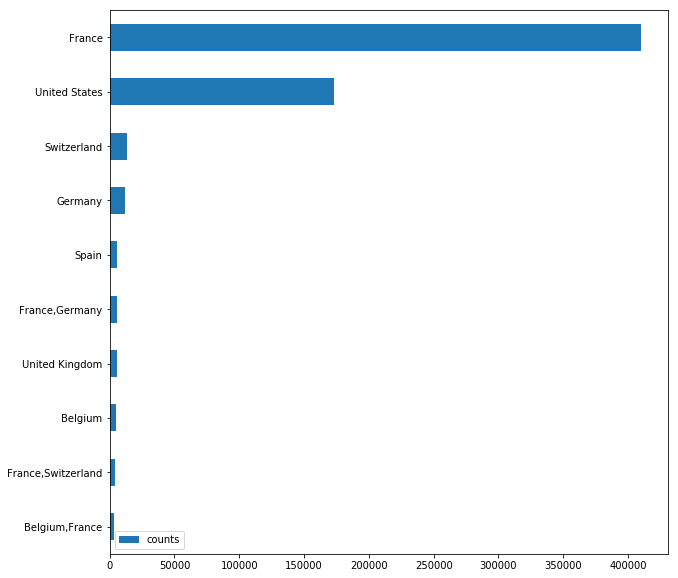

Number of empty records for countries_en: 544 (0.07981197238271015%)
nunique      1361
count      681058
size       681602
Name: countries_en, dtype: int64


In [112]:
##### Get top 10 Countries_en
df_10_countries_en = get_top_10(df_food, 'countries_en')

##### Show Result
print('\nTop 10 countries_en (Counts & Percentage)')
print(df_10_countries_en)    
show_plot(df_10_countries_en)

##### Show Information about empty records
print_stats(df_food, 'countries_en')

<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Origins</b><br>
<i>We are looking what are the origins (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Most of the products (94%) do not have any origines.
    
There is misspelling like 'Union Européenne' and 'Union européenne'

</i>
<br>
</div>


Top 10 origins (Counts & Percentage)
                  counts  percentage
France             10849    1.591691
Union Européenne    1507    0.221097
Italie               927    0.136003
Espagne              856    0.125586
España               667    0.097858
México               636    0.093310
Union européenne     469    0.068808
Australia            462    0.067781
Suisse               372    0.054577
Deutschland          349    0.051203


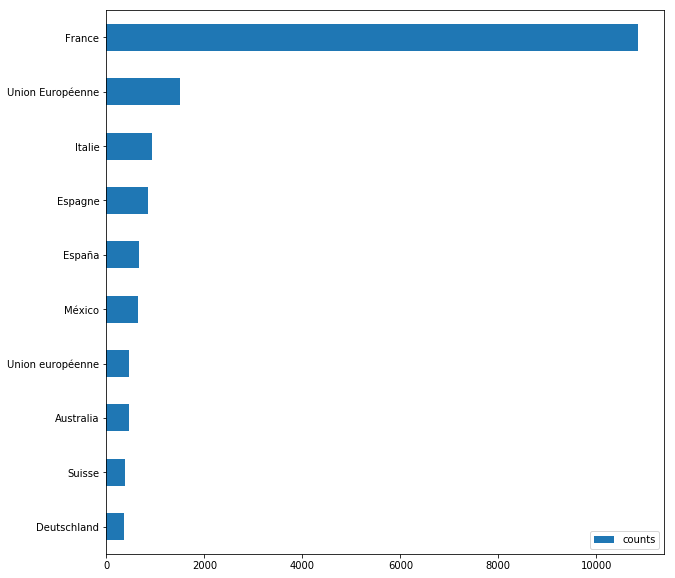

Number of empty records for origins: 640812 (94.01556920314201%)
nunique      7407
count       40790
size       681602
Name: origins, dtype: int64


In [115]:
##### Get top 10 Origins
df_10_origins = get_top_10(df_food, 'origins')

##### Show Result
print('\nTop 10 origins (Counts & Percentage)')
print(df_10_origins)    
show_plot(df_10_origins)

##### Show Information about empty records
print_stats(df_food, 'origins')

<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Main Category</b><br>
<i>We are looking what are the Main Category (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Most of the products (74%) do not have any Main Category.
    
To check if category changes by country, brands,...

</i>
<br>
</div>


Top 10 main_category_en (Counts & Percentage)
                                 counts  percentage
Plant-based foods and beverages   37312    5.474162
Beverages                         25368    3.721820
Sugary snacks                     23588    3.460671
Dairies                           15580    2.285791
Meats                              9589    1.406833
Groceries                          9390    1.377637
Meals                              7669    1.125143
Spreads                            4355    0.638936
Frozen foods                       3093    0.453784
Fruit juices                       3065    0.449676


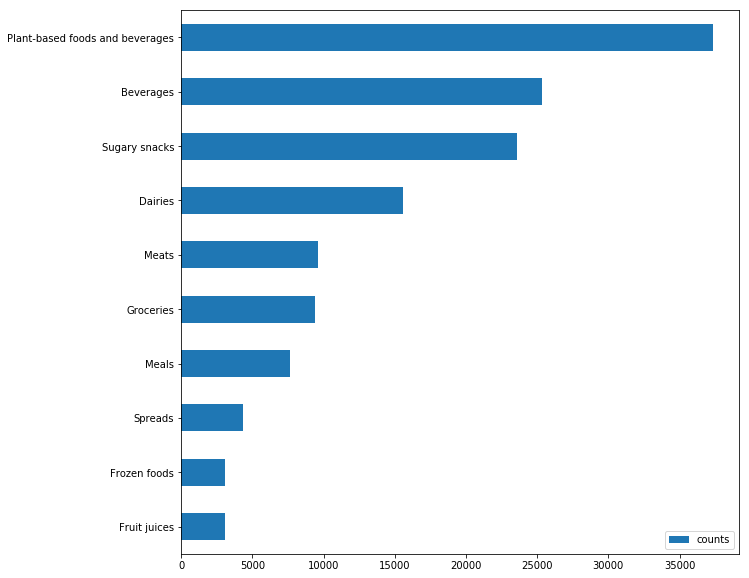

Number of empty records for main_category_en: 507880 (74.51269215759343%)
nunique      6589
count      173722
size       681602
Name: main_category_en, dtype: int64


In [117]:
##### Get top 10 Main Category en
df_10_main_category_en = get_top_10(df_food, 'main_category_en')

##### Show Result
print('\nTop 10 main_category_en (Counts & Percentage)')
print(df_10_main_category_en)    
show_plot(df_10_main_category_en)

##### Show Information about empty records
print_stats(df_food, 'main_category_en')

<div class="alert alert-block alert-warning">

<b>UNDERSTANDING THE DATA - Extra Checks</b><br>
<i>We are looking about the Data Quality to understand what could be used for further analysis</i>
<hr>
<b>Remarks</b><br>
<i>
#Arrh, some product seems to be duplicated...  <br>
#Think about to check first-last Product per Contributors !<br>
#Think about to check per Country !<br>


</i>
<br>
</div>

In [119]:
print('\n\nTop 10 Countries_ens (Counts & Percentage)\n\n' + str(get_top_10(df_food, 'countries_en')))




Top 10 Countries_ens (Counts & Percentage)

                    counts  percentage
France              409951   60.145217
United States       173494   25.453857
Switzerland          13543    1.986937
Germany              11629    1.706128
Spain                 6104    0.895537
France,Germany        5884    0.863260
United Kingdom        5643    0.827903
Belgium               5309    0.778900
France,Switzerland    4345    0.637469
Belgium,France        3505    0.514230


In [120]:
##### Duplicate Products with different product_name, see an example below !
df_food.query('code == 84253269827 ')

    

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
112013,84253269827,http://world-en.openfoodfacts.org/product/0084...,usda-ndb-import,1489143569,2017-03-10T10:59:29Z,1489143570,2017-03-10T10:59:30Z,"Dream, Coffee+Almond Drink, Latte Mocha",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644435,84253269827,http://world-en.openfoodfacts.org/product/8425...,usda-ndb-import,1489142713,2017-03-10T10:45:13Z,1489142713,2017-03-10T10:45:13Z,Coffee+Almond Drink,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-warning">

<b>UNDERSTANDING THE DATA - Extra Queries</b><br>
<i>extra...</i>
<hr>
<b>Remarks</b><br>
<i>
</i>
<br>
</div>

In [127]:
from IPython.core.display import HTML
pd.set_option('display.max_colwidth', -1)
df_food_overview = df_food.query("ingredients_from_palm_oil_n > 0")[['product_name', 'url', 'brands', 'ingredients_from_palm_oil_n', 'nutrition_grade_fr']]
df_food_overview

,product_name,url,brands,ingredients_from_palm_oil_n,nutrition_grade_fr
254,Salade Cesar,http://world-en.openfoodfacts.org/product/0000000290616/salade-cesar-kirkland-signature,Kirkland Signature,1.0,c
322,Pâte à Sucre,http://world-en.openfoodfacts.org/product/0000010206515/pate-a-sucre-alice-delice,Alice Délice,1.0,d
446,Galette de Pommes de Terre,http://world-en.openfoodfacts.org/product/0000069006562/galette-de-pommes-de-terre-bofrost,Bofrost,1.0,b
996,4 Indulgent & Chewy Maple Syrup & Pecan Giant Cookies,http://world-en.openfoodfacts.org/product/00023092/4-indulgent-chewy-maple-syrup-pecan-giant-cookies-marks-spencer,Marks & Spencer,1.0,d
1032,Made Without Wheat Blueberry Muffins,http://world-en.openfoodfacts.org/product/00027083/made-without-wheat-blueberry-muffins-marks-spencer,Marks & Spencer,1.0,d
1033,Chocolate Fudge Cake,http://world-en.openfoodfacts.org/product/00027137/chocolate-fudge-cake-marks-spencer,Marks & Spencer,1.0,e
1071,Chinois Nature Décongelé,http://world-en.openfoodfacts.org/product/0003004032145/chinois-nature-decongele-intermarche,Intermarché,1.0,e
1117,6 Breaded Jumbo Tiger Prawns,http://world-en.openfoodfacts.org/product/00035460/6-breaded-jumbo-tiger-prawns-marks-spencer,Marks & Spencer,1.0,c
1158,Lattice Topped Mince Pies,http://world-en.openfoodfacts.org/product/00045889/lattice-topped-mince-pies-marks-spencer,Marks & Spencer,1.0,e
1211,Arachides enrobées chocolat au lait,http://world-en.openfoodfacts.org/product/00052283/arachides-enrobees-chocolat-au-lait-m-s,M&S,1.0,NaN


In [126]:
pd.set_option('display.max_colwidth', -1)
df_food.query("ingredients_from_palm_oil_n > 0 ")[['product_name', 'url','image_url']].head(100)

,product_name,url,image_url
254,Salade Cesar,http://world-en.openfoodfacts.org/product/0000000290616/salade-cesar-kirkland-signature,NaN
322,Pâte à Sucre,http://world-en.openfoodfacts.org/product/0000010206515/pate-a-sucre-alice-delice,NaN
446,Galette de Pommes de Terre,http://world-en.openfoodfacts.org/product/0000069006562/galette-de-pommes-de-terre-bofrost,NaN
996,4 Indulgent & Chewy Maple Syrup & Pecan Giant Cookies,http://world-en.openfoodfacts.org/product/00023092/4-indulgent-chewy-maple-syrup-pecan-giant-cookies-marks-spencer,NaN
1032,Made Without Wheat Blueberry Muffins,http://world-en.openfoodfacts.org/product/00027083/made-without-wheat-blueberry-muffins-marks-spencer,NaN
1033,Chocolate Fudge Cake,http://world-en.openfoodfacts.org/product/00027137/chocolate-fudge-cake-marks-spencer,NaN
1071,Chinois Nature Décongelé,http://world-en.openfoodfacts.org/product/0003004032145/chinois-nature-decongele-intermarche,NaN
1117,6 Breaded Jumbo Tiger Prawns,http://world-en.openfoodfacts.org/product/00035460/6-breaded-jumbo-tiger-prawns-marks-spencer,NaN
1158,Lattice Topped Mince Pies,http://world-en.openfoodfacts.org/product/00045889/lattice-topped-mince-pies-marks-spencer,NaN
1211,Arachides enrobées chocolat au lait,http://world-en.openfoodfacts.org/product/00052283/arachides-enrobees-chocolat-au-lait-m-s,NaN
